(Text(0.5, 1.0, 'img2'), ([], []), ([], []))

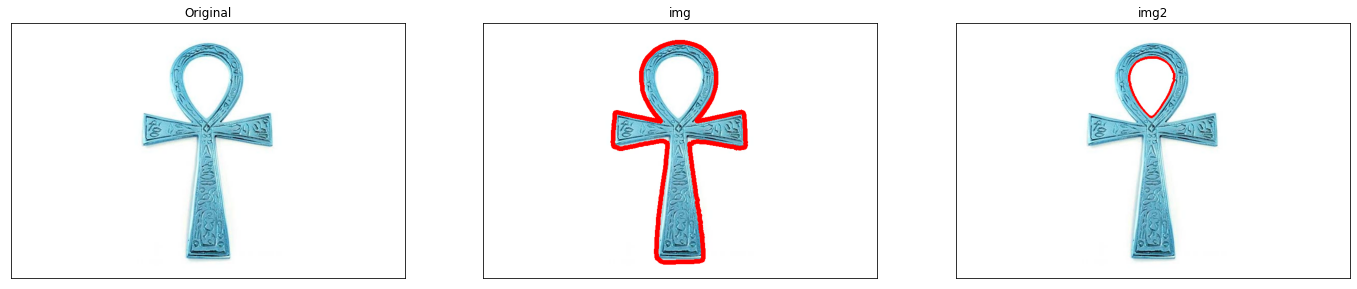

In [94]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
im = cv2.imread('static/The-Ankh.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret,thresh = cv2.threshold(imgray,245,255,0)

kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#thresh = cv2.adaptiveThreshold(imgray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = im.copy()
img2 = im.copy()
img = cv2.drawContours(img, contours, 1, (255,0,0), 8)
img2 = cv2.drawContours(img2, contours, 8, (255,0,0), 3)
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2,cmap = 'gray')
plt.title('img2'), plt.xticks([]), plt.yticks([])

In [72]:
img = cv2.imread('static/The-Ankh.jpg',0)
#ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[4]
M = cv2.moments(cnt)
print(M)

{'m00': 12.0, 'm10': 4194.0, 'm01': 3552.0, 'm20': 1465840.0, 'm11': 1241424.0, 'm02': 1051395.6666666665, 'm30': 512336943.0, 'm21': 433888640.0, 'm12': 367462785.5, 'm03': 311215288.0, 'mu20': 37.0, 'mu11': 0.0, 'mu02': 3.6666666665114462, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 5.4249539971351624e-08, 'mu03': 1.1920928955078125e-07, 'nu20': 0.2569444444444444, 'nu11': 0.0, 'nu02': 0.025462962961885043, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 1.0875342536761534e-10, 'nu03': 2.389774840696097e-10}


In [58]:
#중심좌표
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(area, perimeter)

2.0 5.656854152679443


In [83]:
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))
print(size)

[(0, 4), (1, 507), (2, 2), (3, 2), (4, 2), (5, 2), (6, 10), (7, 2), (8, 152)]
